In [70]:
import scimap as sm
import pandas as pd
import anndata as ad
import numpy as np

In [2]:
path_to_quant = "/Volumes/RD_Coscia/Jose/P26_BCCN/P26E11_Gating_993/quant/993.csv"

In [55]:
df = pd.read_csv(path_to_quant)

In [56]:
meta_columns = ['CellID', 'Y_centroid', 'X_centroid',
    'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
    'Orientation', 'Extent', 'Solidity']

metadata = df[meta_columns]
data = df.drop(columns=meta_columns)
variables = pd.DataFrame(
    index=data.columns,
    data={"math": [column_name.split("_")[0] for column_name in data.columns],
        "marker": ["_".join(column_name.split("_")[1:]) for column_name in data.columns]})

adata = ad.AnnData(X=data.values, obs=metadata, var=variables)
adata

/opt/homebrew/Caskroom/mambaforge/base/envs/scimap/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning:

Transforming to str index.



AnnData object with n_obs × n_vars = 304243 × 75
    obs: 'CellID', 'Y_centroid', 'X_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Orientation', 'Extent', 'Solidity'
    var: 'math', 'marker'

In [58]:
adata.raw = adata

In [59]:
adata = sm.pp.log1p(adata)

In [60]:
adata.write("/Volumes/RD_Coscia/Jose/P26_BCCN/P26E11_Gating_993/quant/993.h5ad")

## adapt raw gates

In [61]:
gates = pd.read_csv("/Volumes/RD_Coscia/Jose/P26_BCCN/P26E11_Gating_993/gates/20240905_gates.csv")

In [62]:
gates

,sample_id,marker_id,gate_value
0,993,std_750_bg,0.0
1,993,std_647_bg,0.0
2,993,std_555_bg,0.0
3,993,std_488_bg,0.0
4,993,std_DAPI_bg,0.0
...,...,...,...
70,993,quantile75_COL1A1,0.0
71,993,quantile75_CD20,0.0
72,993,quantile75_CD68,0.0
73,993,quantile75_Ki67,0.0


In [64]:
gates.gate_value.dtype

dtype('float64')

In [65]:
#filter adata for markers that have gates
# filter gates to only have markers with gate values

gates_filtered = gates[gates.gate_value != 0.0]

In [66]:
gates_filtered

,sample_id,marker_id,gate_value
20,993,mean_Vimentin,360.000000
21,993,mean_CD3e,265.888773
22,993,mean_panCK,235.000000
23,993,mean_CD8,720.000000
25,993,mean_COL1A1,269.463533
26,993,mean_CD20,215.000000
27,993,mean_CD68,65.614527
28,993,mean_Ki67,277.907329


In [67]:
adata = adata[:, gates_filtered.marker_id]

In [87]:
adata.var

,math,marker
mean_Vimentin,mean,Vimentin
mean_CD3e,mean,CD3e
mean_panCK,mean,panCK
mean_CD8,mean,CD8
mean_COL1A1,mean,COL1A1
mean_CD20,mean,CD20
mean_CD68,mean,CD68
mean_Ki67,mean,Ki67


In [71]:
# normalize gates to log1p
gates_filtered['log1p_gate_value'] = np.log1p(gates_filtered.gate_value)

/var/folders/x7/grkjlk8s223dy6234rnz1885mxz2_6/T/ipykernel_10609/864713840.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [72]:
gates_filtered

,sample_id,marker_id,gate_value,log1p_gate_value
20,993,mean_Vimentin,360.000000,5.888878
21,993,mean_CD3e,265.888773,5.586832
22,993,mean_panCK,235.000000,5.463832
23,993,mean_CD8,720.000000,6.580639
25,993,mean_COL1A1,269.463533,5.600137
26,993,mean_CD20,215.000000,5.375278
27,993,mean_CD68,65.614527,4.198923
28,993,mean_Ki67,277.907329,5.630880


In [77]:
adata.obs['imageid'] = "993"

In [79]:
adata.obs['imageid']

0         993
1         993
2         993
3         993
4         993
         ... 
304238    993
304239    993
304240    993
304241    993
304242    993
Name: imageid, Length: 304243, dtype: object

In [83]:
gates_for_scimap = gates_filtered[['marker_id', 'log1p_gate_value']]
gates_for_scimap.rename(columns={'marker_id': 'marker', 'log1p_gate_value': '993'}, inplace=True)

/var/folders/x7/grkjlk8s223dy6234rnz1885mxz2_6/T/ipykernel_10609/3598302544.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [84]:
gates_for_scimap

,marker,993
20,mean_Vimentin,5.888878
21,mean_CD3e,5.586832
22,mean_panCK,5.463832
23,mean_CD8,6.580639
25,mean_COL1A1,5.600137
26,mean_CD20,5.375278
27,mean_CD68,4.198923
28,mean_Ki67,5.630880


# phenotype

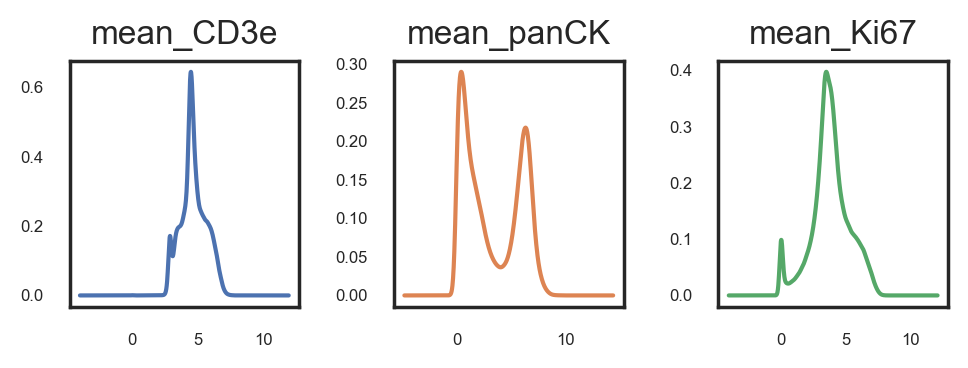

In [85]:
# single 
sm.pl.distPlot(adata, layer='log', markers=['mean_CD3e','mean_panCK','mean_Ki67'], ncols=3, fontsize=6, figsize=(5,2))

In [88]:
adata

AnnData object with n_obs × n_vars = 304243 × 8
    obs: 'CellID', 'Y_centroid', 'X_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Orientation', 'Extent', 'Solidity', 'imageid'
    var: 'math', 'marker'
    layers: 'log'

In [89]:
gates_for_scimap.shape

(8, 2)

In [91]:
adata.raw.shape

(304243, 75)

In [96]:
adata.layers['log'].shape

(304243, 8)

In [98]:
adata.X.shape

(304243, 8)

In [99]:
adata.raw.X.shape

(304243, 75)

In [100]:
# ok, lets try to filter adata.raw for the markers that have gates
adata.raw = adata.raw[:, gates_filtered.marker_id]

ValueError: Can only init raw attribute with an AnnData object.

In [ ]:
# ok, lets filter before the log1p transformation

In [93]:
adata = sm.pp.rescale(adata, gate=gates_for_scimap, log=False, verbose=True)

Scaling Image 993


/opt/homebrew/Caskroom/mambaforge/base/envs/scimap/lib/python3.10/site-packages/scimap/preprocessing/rescale.py:105: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



ValueError: Shape of passed values is (304243, 75), indices imply (304243, 8)

Not intuitive thing about SCIMAP:  
----> Rescaling takes in the raw values, not the log1p values. 

# Filtering before any step

In [101]:
path_to_quant = "/Volumes/RD_Coscia/Jose/P26_BCCN/P26E11_Gating_993/quant/993.csv"
df = pd.read_csv(path_to_quant)

meta_columns = ['CellID', 'Y_centroid', 'X_centroid',
    'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
    'Orientation', 'Extent', 'Solidity']

metadata = df[meta_columns]
data = df.drop(columns=meta_columns)
variables = pd.DataFrame(
    index=data.columns,
    data={"math": [column_name.split("_")[0] for column_name in data.columns],
        "marker": ["_".join(column_name.split("_")[1:]) for column_name in data.columns]})

adata = ad.AnnData(X=data.values, obs=metadata, var=variables)
adata

/opt/homebrew/Caskroom/mambaforge/base/envs/scimap/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning:

Transforming to str index.



AnnData object with n_obs × n_vars = 304243 × 75
    obs: 'CellID', 'Y_centroid', 'X_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Orientation', 'Extent', 'Solidity'
    var: 'math', 'marker'

In [102]:
gates = pd.read_csv("/Volumes/RD_Coscia/Jose/P26_BCCN/P26E11_Gating_993/gates/20240905_gates.csv")
gates = gates[gates.gate_value != 0.0]

In [103]:
adata = adata[:, gates.marker_id]

In [105]:
adata

View of AnnData object with n_obs × n_vars = 304243 × 8
    obs: 'CellID', 'Y_centroid', 'X_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Orientation', 'Extent', 'Solidity'
    var: 'math', 'marker'

 Now we can proceed as if 

In [106]:
adata.raw = adata
adata = sm.pp.log1p(adata)
adata.write("/Volumes/RD_Coscia/Jose/P26_BCCN/P26E11_Gating_993/quant/993_gate_filtered.h5ad")

In [107]:
adata.obs['imageid'] = "993"

In [108]:
# normalize gates to log1p
gates['log1p_gate_value'] = np.log1p(gates.gate_value)
gates_for_scimap = gates[['marker_id', 'log1p_gate_value']]
gates_for_scimap.rename(columns={'marker_id': 'marker', 'log1p_gate_value': '993'}, inplace=True)

/var/folders/x7/grkjlk8s223dy6234rnz1885mxz2_6/T/ipykernel_10609/3840965615.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [109]:
gates_for_scimap

,marker,993
20,mean_Vimentin,5.888878
21,mean_CD3e,5.586832
22,mean_panCK,5.463832
23,mean_CD8,6.580639
25,mean_COL1A1,5.600137
26,mean_CD20,5.375278
27,mean_CD68,4.198923
28,mean_Ki67,5.630880


In [110]:
adata = sm.pp.rescale(adata, gate=gates_for_scimap, log=True, verbose=True)

/opt/homebrew/Caskroom/mambaforge/base/envs/scimap/lib/python3.10/site-packages/scimap/preprocessing/rescale.py:105: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Scaling Image 993
Scaling mean_Vimentin
Scaling mean_CD3e
Scaling mean_panCK
Scaling mean_CD8
Scaling mean_COL1A1
Scaling mean_CD20
Scaling mean_CD68
Scaling mean_Ki67


In [118]:
adata.var.index.tolist()

['mean_Vimentin',
 'mean_CD3e',
 'mean_panCK',
 'mean_CD8',
 'mean_COL1A1',
 'mean_CD20',
 'mean_CD68',
 'mean_Ki67']

In [114]:
adata.raw.X[:2,:2]

array([[339.81894484, 215.85731415],
       [122.27565632, 173.4928401 ]])

In [115]:
adata.X[:2,:2]

array([[0.4951164 , 0.48142261],
       [0.40877313, 0.46197004]])

In [124]:
path_to_phenotype_matrix = "/Volumes/RD_Coscia/Jose/P26_BCCN/P26E11_Gating_993/20240905_PhenotypeMatrix.csv"

In [125]:
phenotype_matrix = pd.read_csv(path_to_phenotype_matrix)

In [128]:
adata = sm.tl.phenotype_cells (adata, phenotype=phenotype_matrix, label="phenotype") 

Phenotyping Cancer_cells
Phenotyping Immune_cells
Phenotyping Vimentin_cells
Phenotyping COL1A1_cells
-- Subsetting Immune_cells
Phenotyping T_cells
Phenotyping B_cells
Phenotyping Macrophages
-- Subsetting T_cells
Phenotyping CD4_Tcells
Phenotyping CD8_Tcells
Consolidating the phenotypes across all groups


/opt/homebrew/Caskroom/mambaforge/base/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:290: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/opt/homebrew/Caskroom/mambaforge/base/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:290: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [129]:
adata.obs.phenotype.value_counts()

phenotype
Cancer_cells         89204
COL1A1_cells         86300
Unknown              62596
CD4_Tcells           23501
Vimentin_cells       22375
CD8_Tcells           12622
T_cells               2219
likely-CD8_Tcells     1944
B_cells               1876
Macrophages           1606
Name: count, dtype: int64

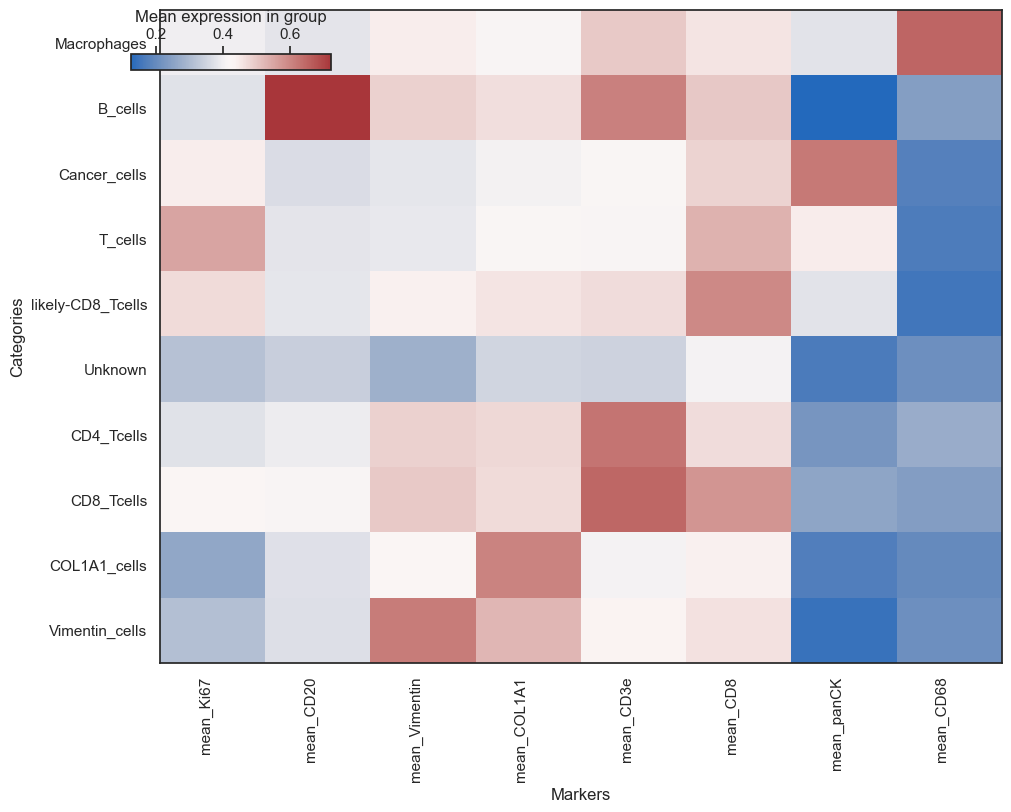

In [134]:
sm.pl.heatmap(adata, groupBy='phenotype', saveDir=None, fileName=None)

In [135]:
phenotype_matrix_v2 = pd.read_csv("/Volumes/RD_Coscia/Jose/P26_BCCN/P26E11_Gating_993/20240905_PhenotypeMatrix_v2.csv")

In [136]:
sm.tl.phenotype_cells(adata, phenotype=phenotype_matrix_v2, label="phenotype_v2")

Phenotyping Cancer_cells
Phenotyping Immune_cells
Phenotyping Vimentin_cells
Phenotyping COL1A1_cells
-- Subsetting Immune_cells
Phenotyping T_cells
Phenotyping B_cells
Phenotyping Macrophages
-- Subsetting T_cells
Phenotyping CD4_Tcells
Phenotyping CD8_Tcells
Consolidating the phenotypes across all groups


/opt/homebrew/Caskroom/mambaforge/base/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:290: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/opt/homebrew/Caskroom/mambaforge/base/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:290: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



AnnData object with n_obs × n_vars = 304243 × 8
    obs: 'CellID', 'Y_centroid', 'X_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Orientation', 'Extent', 'Solidity', 'imageid', 'phenotype', 'phenotype_v2'
    var: 'math', 'marker'
    uns: 'gates'
    layers: 'log'

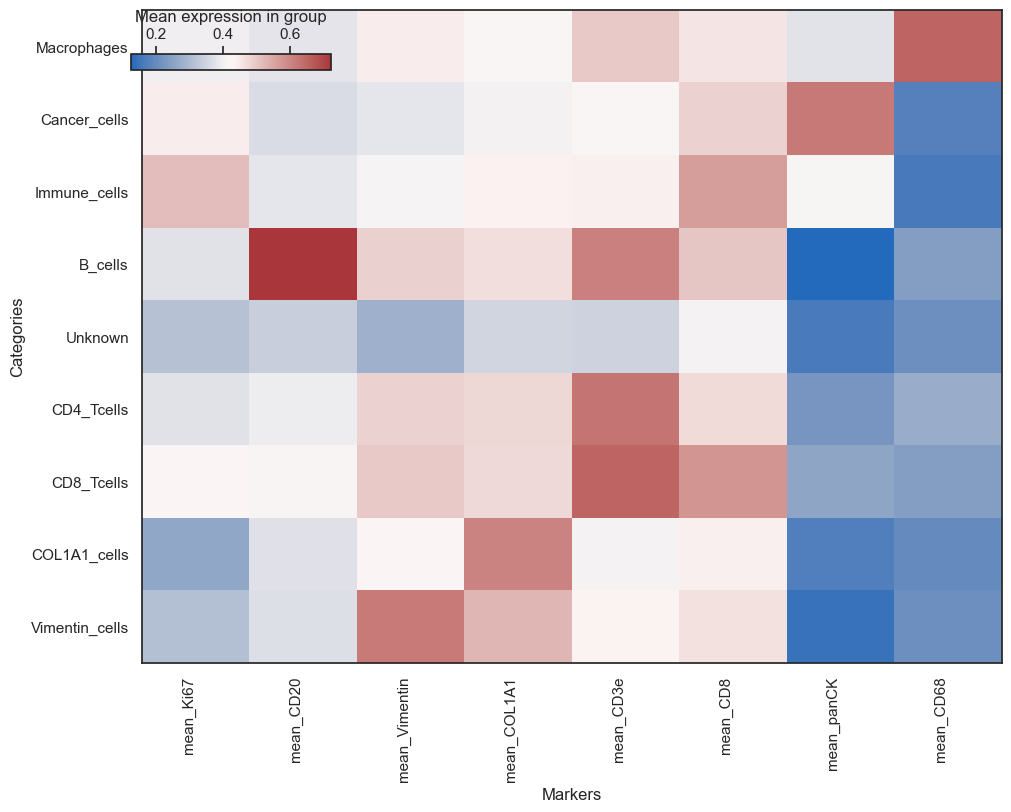

In [137]:
sm.pl.heatmap(adata, groupBy='phenotype_v2', saveDir=None, fileName=None)

Phenotyping Cancer_cells
Phenotyping T_cells
Phenotyping Vimentin_cells
Phenotyping COL1A1_cells
Phenotyping B_cells
Phenotyping Macrophages
-- Subsetting T_cells
Phenotyping CD4_Tcells
Phenotyping CD8_Tcells
Consolidating the phenotypes across all groups


/opt/homebrew/Caskroom/mambaforge/base/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:290: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/opt/homebrew/Caskroom/mambaforge/base/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:290: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



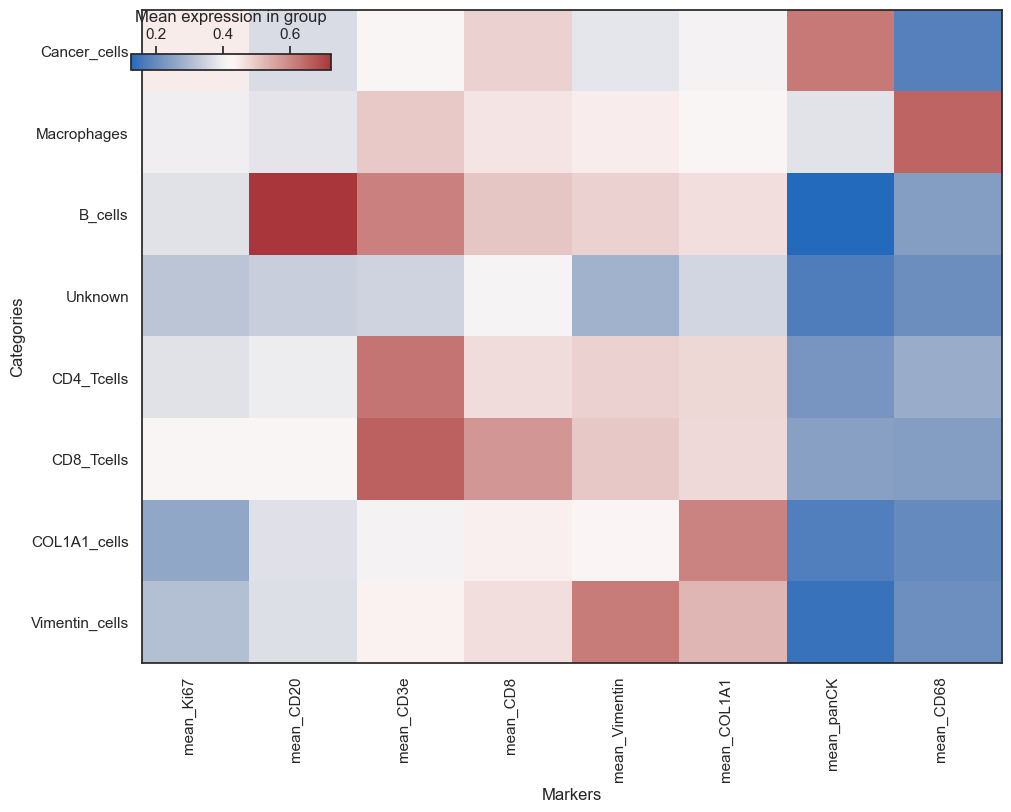

In [138]:
phenotype_matrix_v3 = pd.read_csv("/Volumes/RD_Coscia/Jose/P26_BCCN/P26E11_Gating_993/20240905_PhenotypeMatrix_v3.csv")
sm.tl.phenotype_cells(adata, phenotype=phenotype_matrix_v3, label="phenotype_v3")
sm.pl.heatmap(adata, groupBy='phenotype_v3', saveDir=None, fileName=None)

/opt/homebrew/Caskroom/mambaforge/base/envs/scimap/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/opt/homebrew/Caskroom/mambaforge/base/envs/scimap/lib/python3.10/site-packages/scimap/plotting/umap.py:270: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



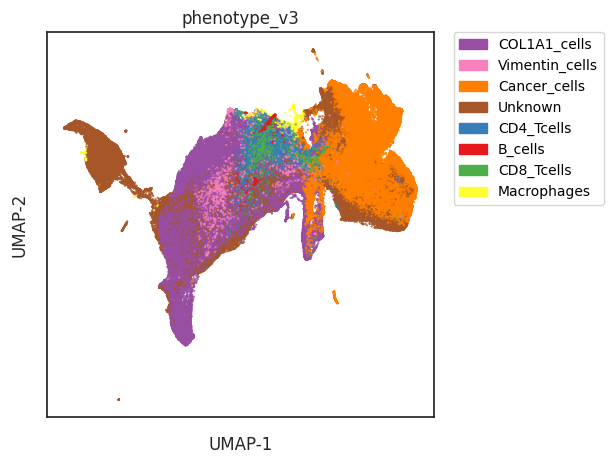

In [139]:
adata = sm.tl.umap(adata)
sm.pl.umap(adata, color=['phenotype_v3'])

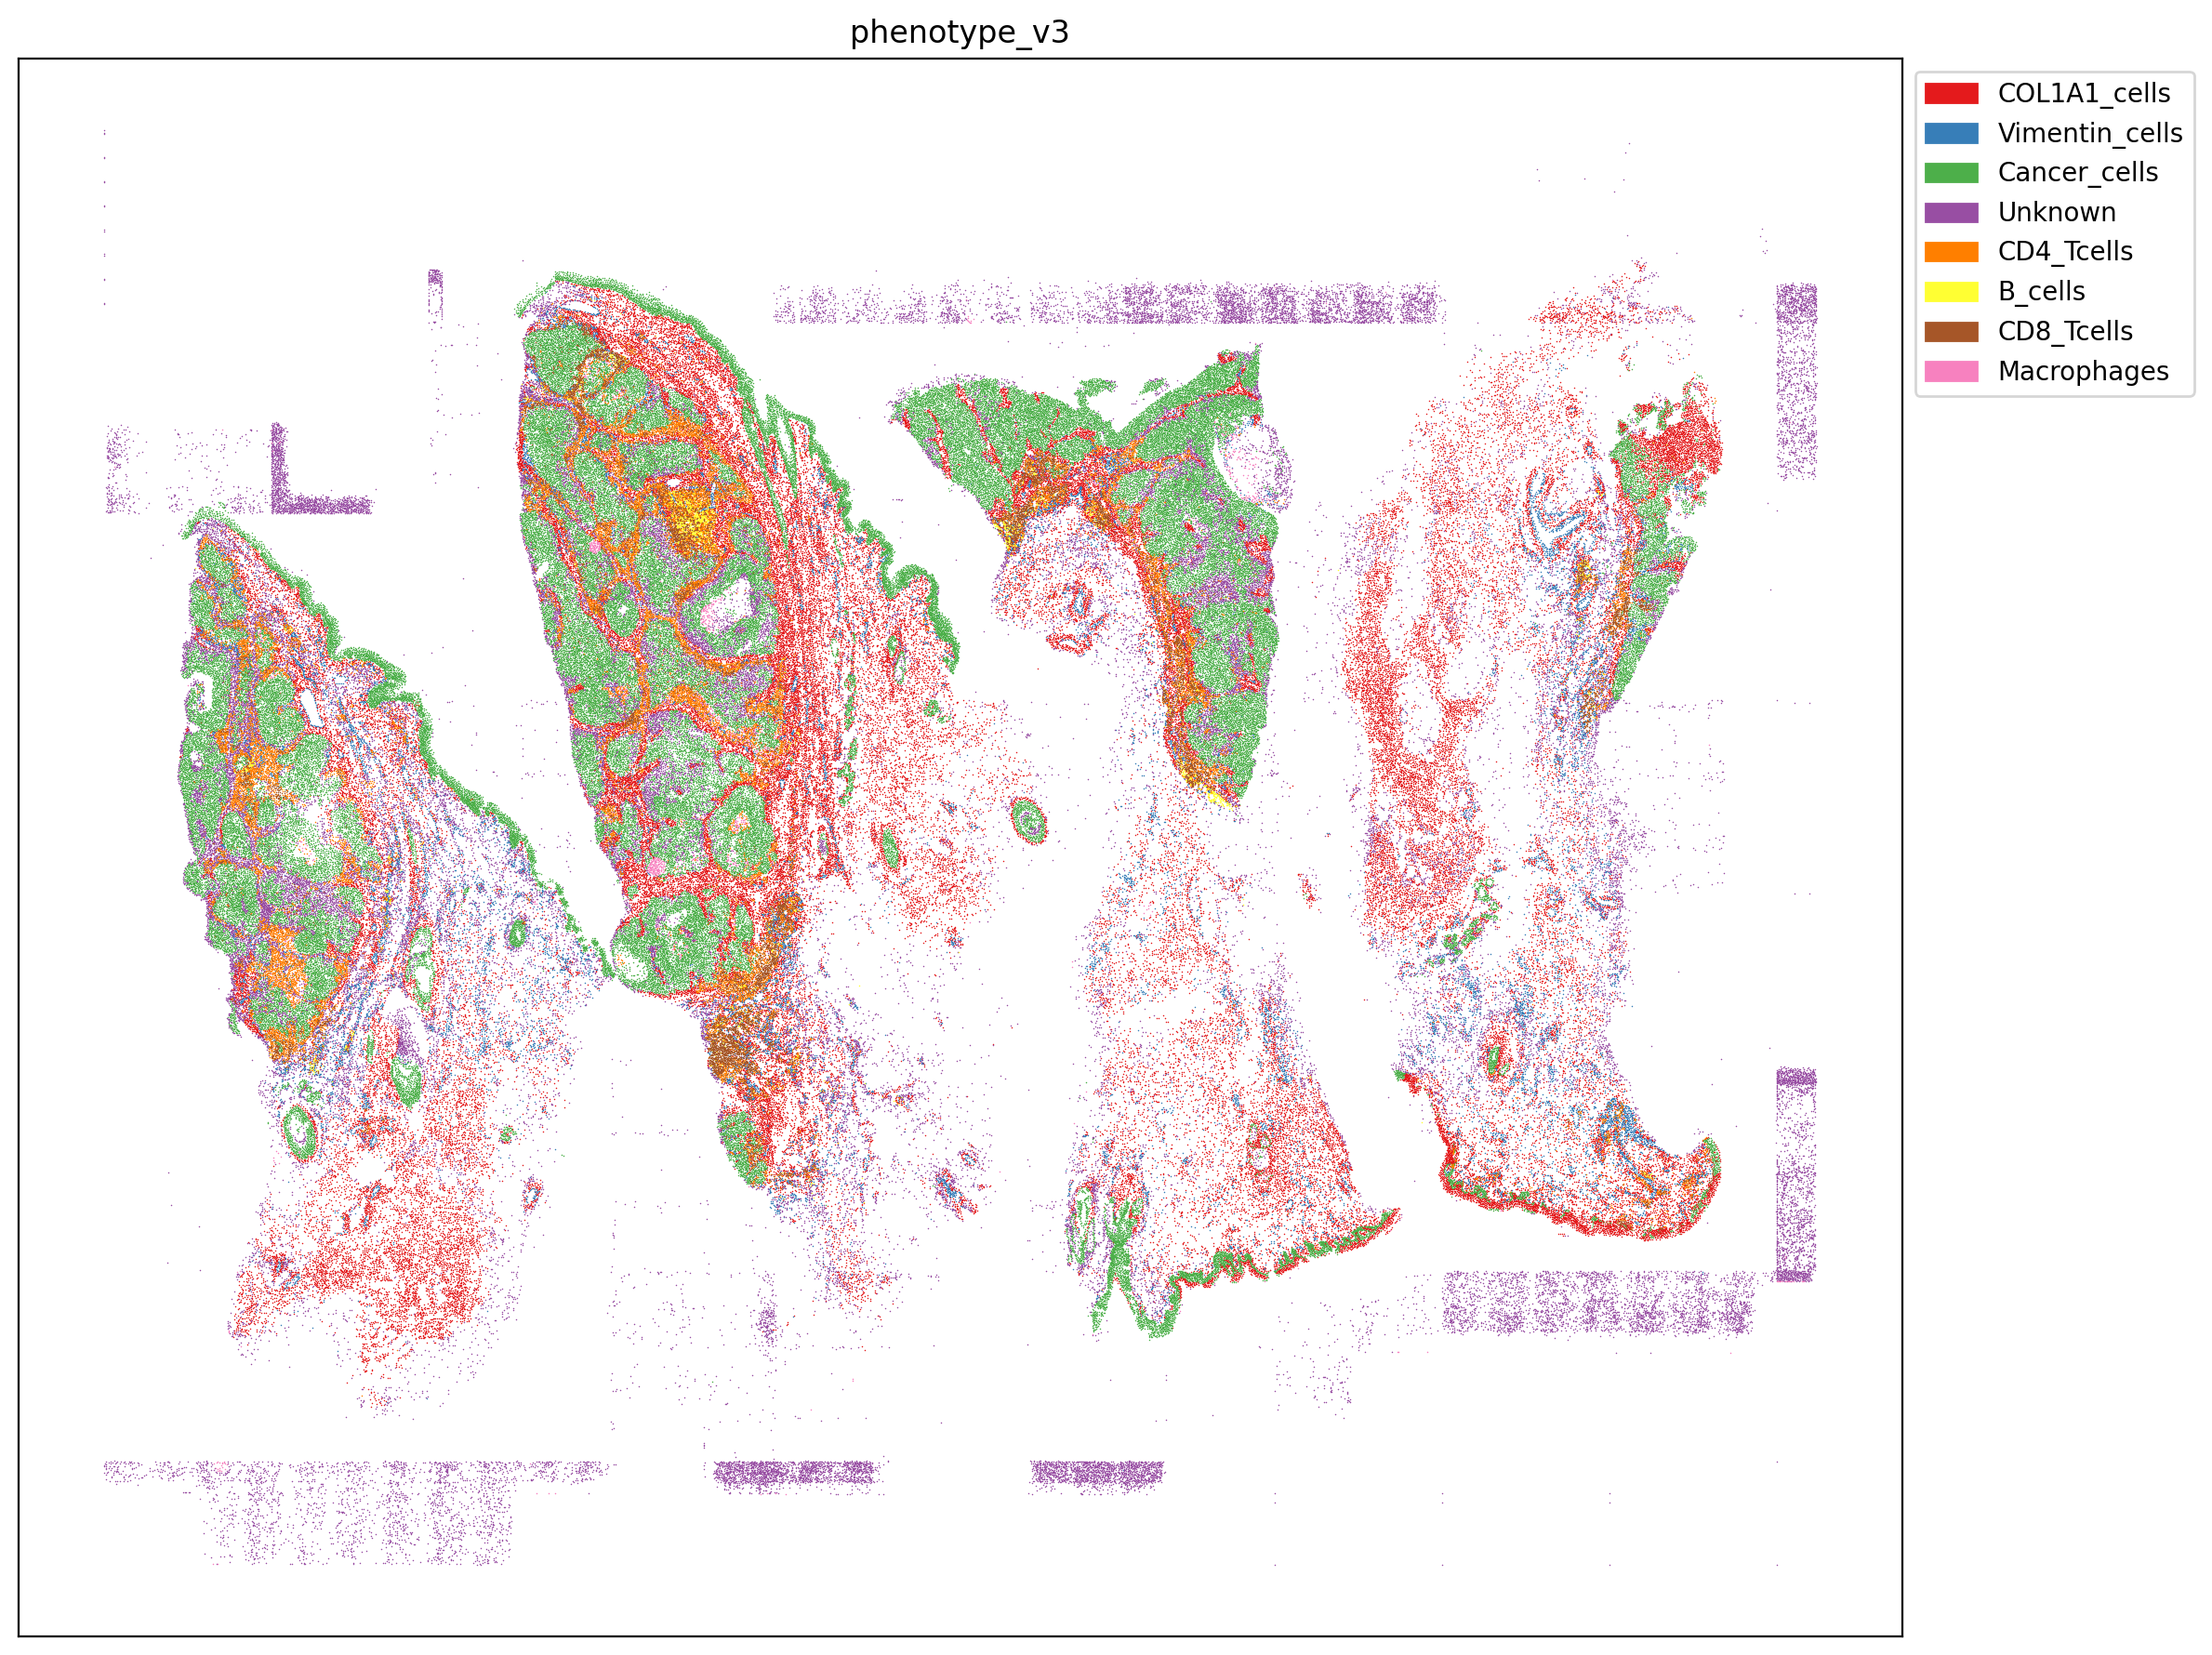

In [147]:
sm.pl.spatial_scatterPlot (adata, colorBy = ['phenotype_v3'],figsize=(12,9), s=0.3, fontsize=10, catCmap='Set1')

In [140]:
adata.write("/Volumes/RD_Coscia/Jose/P26_BCCN/P26E11_Gating_993/quant/993_gate_filtered_phenotyped.h5ad")

In [148]:
adata

AnnData object with n_obs × n_vars = 304243 × 8
    obs: 'CellID', 'Y_centroid', 'X_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Orientation', 'Extent', 'Solidity', 'imageid', 'phenotype', 'phenotype_v2', 'phenotype_v3'
    var: 'math', 'marker'
    uns: 'gates'
    obsm: 'umap'
    layers: 'log'

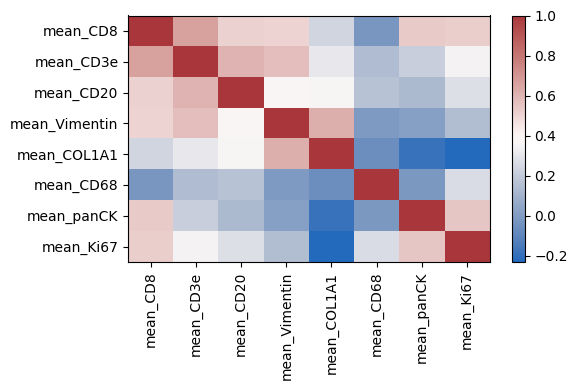

In [151]:
sm.pl.markerCorrelation(adata, figsize=(6,4))

In [152]:
adata = sm.tl.spatial_distance (adata, phenotype='phenotype_v3')

Processing Image: 993


In [153]:
sm.pl.spatial_distance (adata, figsize=(5,4))

KeyError: "['T_cells', 'likely-CD8_Tcells'] not in index"

In [154]:
adata

AnnData object with n_obs × n_vars = 304243 × 8
    obs: 'CellID', 'Y_centroid', 'X_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Orientation', 'Extent', 'Solidity', 'imageid', 'phenotype', 'phenotype_v2', 'phenotype_v3'
    var: 'math', 'marker'
    uns: 'gates', 'spatial_distance'
    obsm: 'umap'
    layers: 'log'